NB: Do not write queries for the questions below. Use numpy, pandas, matplotlib and searborn. The only query you should have is to join the two tables in pd.read_sql

Questions: 
1. Create a new column for selling_price that is taking a 25% markup from the original buying_price column. This should be something like new_sp = buying_price*1.25. Use this new column moving forward for selling price, not the original
2. Create a new column for profit that is now using the new_sp column. Use this new profit column moving forward.
3. Display the total sales ever made in the duka.
4. Display the top 5 products of the business, in terms of sales.
5. Display the best performing month in the business in terms of sales
6. Graph the sales of each of the products ordered. 
7. What is the correlation value between the buying_price and profit?
8. If possible, what is the correlation between product_name and profit?
9. Graph the monthly sales.
10. Clean up the unused columns like the old selling price and profit, then dump a csv file of the clean dataset. Ensure the output is called duka_sales_cleaned.csv


Once this is done, you push on your Github repository. You are allowed to discuss.

In [1]:
pip install pyscopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
from sqlalchemy import create_engine as ce



In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
conn=psycopg2.connect("dbname=my_duka user=postgres password=@Carol#2023")

In [5]:
df=pd.read_sql("select * from products",conn)

In [6]:
df.head()

,id,productname,buying_price,selling_price,stock_quantity
0,1,omo,125.5,180.0,50
1,2,barsoap,62.0,120.0,100
2,3,tissues,30.0,50.0,2000
3,4,sweets,20.0,60.0,1000
4,5,rice,450.0,900.0,100


In [7]:
#  Create a new column for selling_price that is taking a 25% markup from the original buying_price column. 
# This should be something like new_sp = buying_price*1.25. Use this new column moving forward for selling price, 
# not the original

df['new_sp'] = df['buying_price'] * 1.25

In [8]:
df.head(30)

,id,productname,buying_price,selling_price,stock_quantity,new_sp
0,1,omo,125.50,180.00,50,156.8750
1,2,barsoap,62.00,120.00,100,77.5000
2,3,tissues,30.00,50.00,2000,37.5000
3,4,sweets,20.00,60.00,1000,25.0000
4,5,rice,450.00,900.00,100,562.5000
5,6,Nantucket Cranberry Juice,19.24,25.01,9,24.0500
6,7,Swiss Chard,84.72,110.14,6,105.9000
7,8,Rabbit - Saddles,92.92,120.80,6,116.1500
8,9,"Wine - White, Concha Y Toro",37.71,49.02,2,47.1375
9,10,"Lemonade - Mandarin, 591 Ml",43.98,57.17,4,54.9750


In [12]:
df['profit']=(df['new_sp']- df['buying_price'])
df

,id,productname,buying_price,selling_price,stock_quantity,new_sp,profit
0,1,omo,125.50,180.00,50,156.8750,31.3750
1,2,barsoap,62.00,120.00,100,77.5000,15.5000
2,3,tissues,30.00,50.00,2000,37.5000,7.5000
3,4,sweets,20.00,60.00,1000,25.0000,5.0000
4,5,rice,450.00,900.00,100,562.5000,112.5000
5,6,Nantucket Cranberry Juice,19.24,25.01,9,24.0500,4.8100
6,7,Swiss Chard,84.72,110.14,6,105.9000,21.1800
7,8,Rabbit - Saddles,92.92,120.80,6,116.1500,23.2300
8,9,"Wine - White, Concha Y Toro",37.71,49.02,2,47.1375,9.4275
9,10,"Lemonade - Mandarin, 591 Ml",43.98,57.17,4,54.9750,10.9950


In [13]:
df=pd.read_sql("select * from sales join products on products.id=sales.pid",conn)

In [14]:
df

,id,pid,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity
0,1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,180.00,50
1,2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100
2,3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000
3,4,28,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,29.03,9
4,5,3,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,50.00,2000
...,...,...,...,...,...,...,...,...,...
1000,1001,19,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,118.40,9
1001,1002,26,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,110.42,9
1002,1003,23,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,35.82,1
1003,1007,4,5.00,2023-10-07 15:08:15.130672,4,sweets,20.00,60.00,1000


In [16]:
df['new_sp'] = df['buying_price'] * 1.25
df

,id,pid,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity,new_sp
0,1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,180.00,50,156.8750
1,2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100,77.5000
2,3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000,37.5000
3,4,28,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,29.03,9,27.9125
4,5,3,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,50.00,2000,37.5000
...,...,...,...,...,...,...,...,...,...,...
1000,1001,19,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,118.40,9,113.8500
1001,1002,26,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,110.42,9,106.1750
1002,1003,23,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,35.82,1,34.4375
1003,1007,4,5.00,2023-10-07 15:08:15.130672,4,sweets,20.00,60.00,1000,25.0000


In [18]:
df['profit']=(df['new_sp']- df['buying_price'])*df['quantity']
df

,id,pid,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity,new_sp,profit
0,1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,180.00,50,156.8750,156.875000
1,2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100,77.5000,186.000000
2,3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000,37.5000,375.000000
3,4,28,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,29.03,9,27.9125,24.953775
4,5,3,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,50.00,2000,37.5000,13.350000
...,...,...,...,...,...,...,...,...,...,...,...
1000,1001,19,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,118.40,9,113.8500,62.845200
1001,1002,26,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,110.42,9,106.1750,92.372250
1002,1003,23,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,35.82,1,34.4375,25.208250
1003,1007,4,5.00,2023-10-07 15:08:15.130672,4,sweets,20.00,60.00,1000,25.0000,25.000000


In [51]:
total_sales=sum(df['new_sp']*df['quantity'])
total_sales

257188.41575

In [52]:
# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Calculate the sales for each row 
df['Sales'] = df['new_sp'] - df['buying_price']

# Extract the month from the 'created_at' column and add it to the original DataFrame
df['Month'] = df['created_at'].dt.to_period('M')


# Find the month with the highest total sales
best_month = df.groupby('Month')['Sales'].sum().idxmax()

best_month



Period('2022-12', 'M')

In [53]:
df_sorted = df.sort_values(by='quantity', ascending=False)
df_sorted.head(5)

,id,pid,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity,new_sp,profit,Sales,Month
2,3,3,50.0,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000,37.500,375.000,7.500,2023-09
1,2,2,12.0,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100,77.500,186.000,15.500,2023-09
1004,1010,1,9.0,2023-10-07 15:38:27.542737,1,omo,125.50,180.00,50,156.875,282.375,31.375,2023-10
10,11,24,5.0,2023-01-18 19:03:31.000000,24,Ice Cream Bar - Oreo Sandwich,42.12,54.76,7,52.650,52.650,10.530,2023-01
1003,1007,4,5.0,2023-10-07 15:08:15.130672,4,sweets,20.00,60.00,1000,25.000,25.000,5.000,2023-10


<Axes: title={'center': 'SALES'}, ylabel='Frequency'>

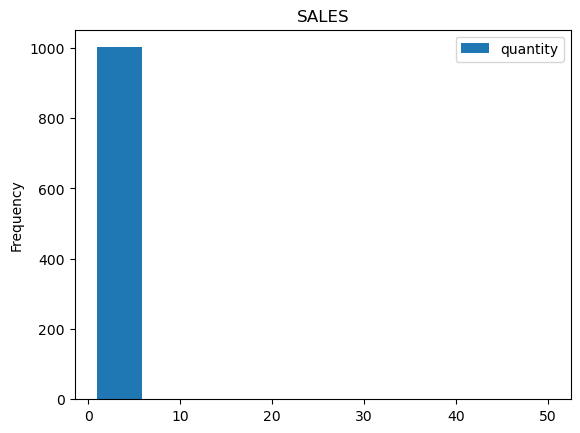

In [54]:
df.plot(kind='hist', x='productname', y='quantity', title='SALES')

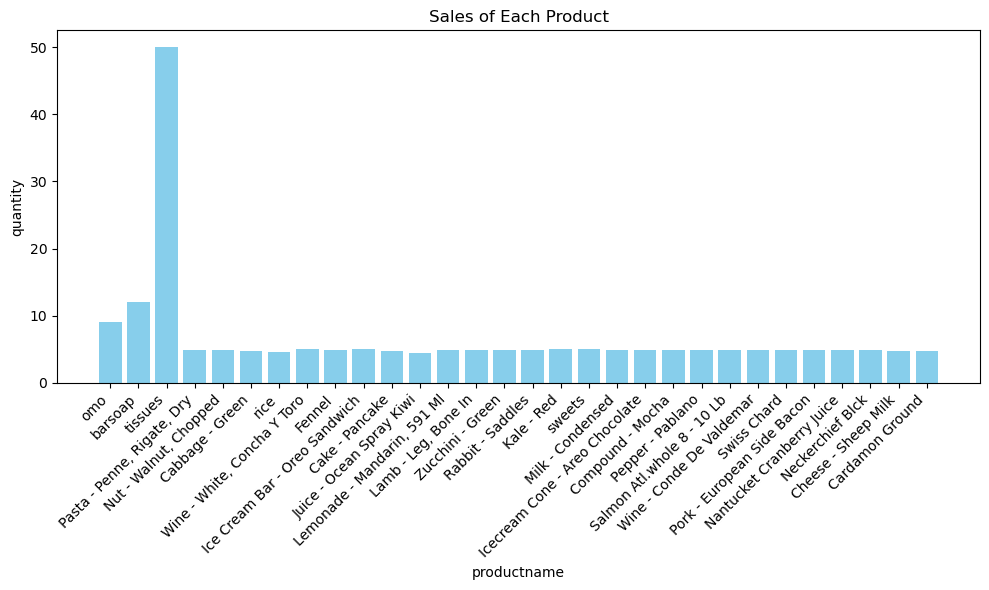

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(df['productname'], df['quantity'], color='skyblue')
plt.xlabel('productname')
plt.ylabel('quantity')
plt.title('Sales of Each Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [56]:
df['buying_price'].corr(df['profit'])

0.8488484841515672

In [57]:
df['productname'].astype('category').cat.codes.corr(df['profit'])

0.2946258573782781

Text(0.5, 1.0, 'Total Sales per Month')

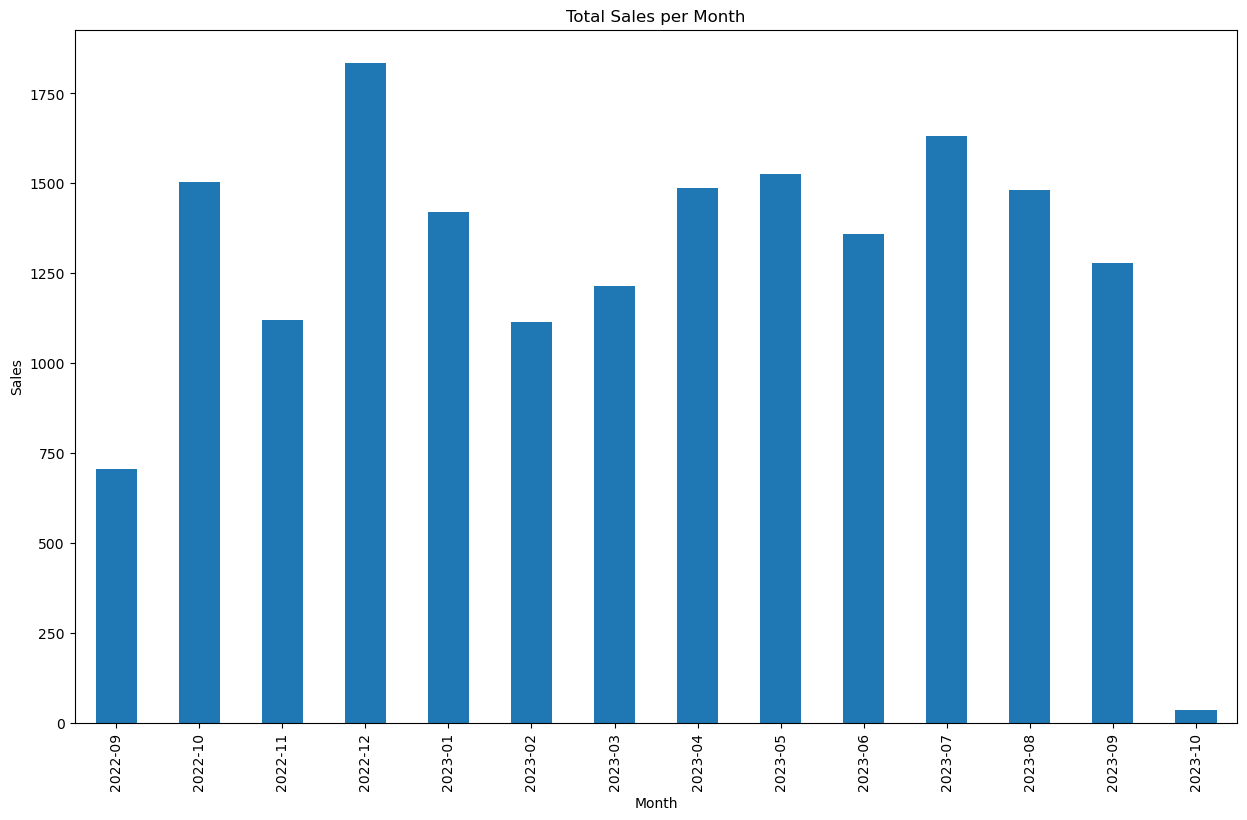

In [61]:
# Group by the month extracted from the 'Date' column and sum the 'Sales' within each group
grouped_df = df.groupby(df['created_at'].dt.to_period('M'))['Sales'].sum()

# Create a bar plot
grouped_df.plot(kind='bar', rot=90, figsize=(15,9)) 
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales per Month')

In [62]:
#cleaning the data